In [1]:
# import necessary libraries
import sklearn
import pandas
import numpy
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# read in processed data as a CSV file
data = pandas.read_csv('PostBasketballStats.csv')

# drops rows with any missing values
data.dropna(inplace=True)

# sets the columns used as predictors
predictors = ['MIN%', 'PRPG!', 'D-PRPG', 'BPM', 'OBPM', 'DBPM', 'ORTG', 'USG', 'EFG', 'TS', 'OR', 'DR', 'AST', 'TO', 'A/TO', 'BLK', 'STL', 'FTR', 'FC/40', 'CLOSE 2 %', 'FAR 2 %', 'FT %', '2P %', '3PR', '3P/100', '3P %', 'AST.1', 'REB', 'PTS', 'Dunk_Percentage']

# sets the ranking as the column to be predicted
target = 'RK'

# split the data into training data and testing data
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=0)

In [2]:
# Normalize Data
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [3]:
# create random forest
forest = RandomForestRegressor(n_estimators=20,max_features=9,max_depth=12,max_leaf_nodes=36,min_samples_split=12,min_samples_leaf=3)
# fit forest to training data
forest.fit(train_data, train_sln)
# use the forest to predict the test data
predictions = forest.predict(test_data)

# calculate and show r2 value for model
r2 = metrics.r2_score(test_sln,predictions)
print(r2)

0.9893287340597774


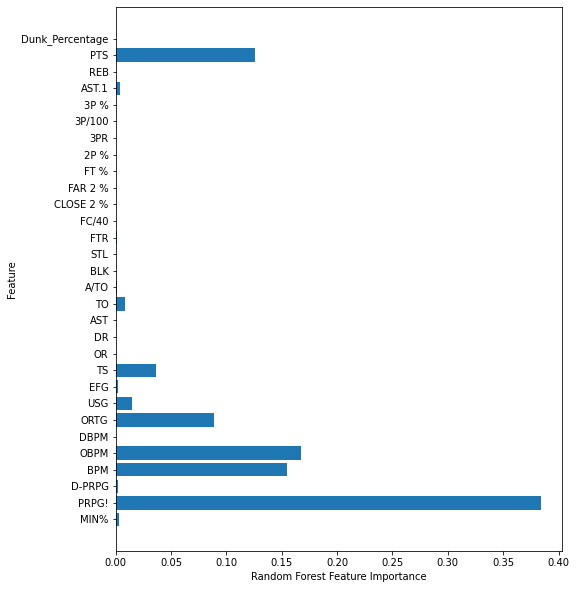

In [4]:
#see which features were most important for determining player ranking

# import matplot for plots
import matplotlib.pyplot as plt
%matplotlib inline

index = range(len(predictors))

# create plot
plt.figure(figsize=(8,10))
plt.barh(index, forest.feature_importances_,height=0.8)
plt.ylabel('Feature')
plt.yticks(index,predictors)
plt.xlabel("Random Forest Feature Importance")
plt.show()

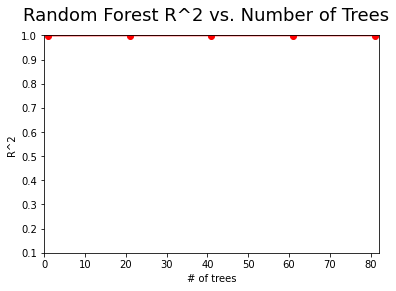

In [5]:
# tune number of trees by testing various values and then visualizing them to see which value(s) have the highest
# r2 value
def tune_number_of_trees(n_estimator_values, train_data, test_data, train_sln, test_sln):
    rf_regression = []
    for n in n_estimator_values:
        current_rf = RandomForestRegressor(n_estimators=n, random_state=13)
        current_rf.fit(train_data,train_sln)
        current_predictions = current_rf.predict(test_data)
        current_regression = metrics.r2_score(test_sln, current_predictions)
        rf_regression.append(current_regression)
        
    plt.suptitle('Random Forest R^2 vs. Number of Trees', fontsize=18)
    plt.xlabel('# of trees')
    plt.ylabel('R^2')
    plt.plot(n_estimator_values,rf_regression,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,.1,1])
    
    plt.show()

tune_number_of_trees(range(1,100,20), train_data, test_data, train_sln, test_sln)


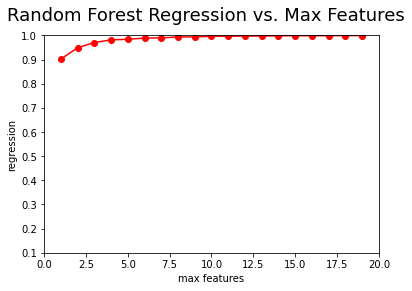

In [6]:
# tune the maximum number of features considered by testing various values and then visualizing them to see which value(s) have the highest
# r2 value
def tune_max_features(max_features_values, train_data, test_data, train_sln, test_sln):
    rf_regression = []
    for m in max_features_values:
        current_rf = RandomForestRegressor(n_estimators=20, max_features=m, random_state=13)
        current_rf.fit(train_data,train_sln)
        current_predictions=current_rf.predict(test_data)
        current_r2=metrics.r2_score(test_sln,current_predictions)
        rf_regression.append(current_r2)
        
    plt.suptitle('Random Forest Regression vs. Max Features',fontsize=18)
    plt.xlabel('max features')
    plt.ylabel('regression')
    plt.plot(max_features_values,rf_regression,'ro-')
    plt.axis([0,max_features_values[-1]+1,.1,1])
    plt.show()
    
tune_max_features(range(1,20), train_data, test_data, train_sln, test_sln)

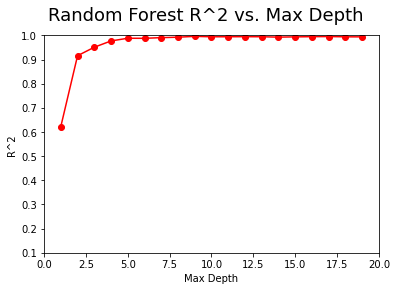

In [7]:
# tune the maximum depth of the trees in the random forest by testing various values and then visualizing them to see which value(s) have the highest
# r2 value
def tune_max_depth(max_depth_values, train_data, test_data, train_sln, test_sln):
    rf_regression = []
    for d in max_depth_values:
        current_rf = RandomForestRegressor(n_estimators=20,max_features=9,max_depth=d)
        current_rf.fit(train_data, train_sln)
        current_prediction = current_rf.predict(test_data)
        current_regression = metrics.r2_score(test_sln, current_prediction)
        rf_regression.append(current_regression)
        
    plt.suptitle('Random Forest R^2 vs. Max Depth',fontsize=18)
    plt.xlabel('Max Depth')
    plt.ylabel('R^2')
    plt.plot(max_depth_values,rf_regression,'ro-')
    plt.axis([0,max_depth_values[-1]+1,.1,1])

    plt.show()

tune_max_depth(range(1,20), train_data, test_data, train_sln, test_sln)

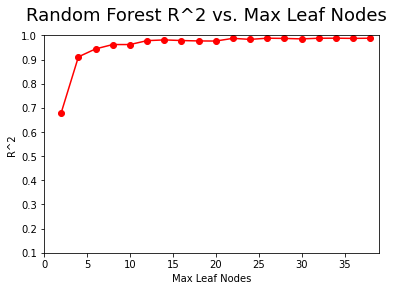

In [8]:
# tune the maximum number of leaf nodes of the trees in the random forest by testing various values and then visualizing them to see which value(s) have the highest
# r2 value
def tune_max_leaf_nodes(max_ln_values, train_data, test_data, train_sln, test_sln):
    rf_regression = []
    for l in max_ln_values:
        current_rf = RandomForestRegressor(n_estimators=20,max_features=9,max_depth=12,max_leaf_nodes=l)
        current_rf.fit(train_data, train_sln)
        current_prediction = current_rf.predict(test_data)
        current_regression = metrics.r2_score(test_sln, current_prediction)
        rf_regression.append(current_regression)
        
    plt.suptitle('Random Forest R^2 vs. Max Leaf Nodes',fontsize=18)
    plt.xlabel('Max Leaf Nodes')
    plt.ylabel('R^2')
    plt.plot(max_ln_values,rf_regression,'ro-')
    plt.axis([0,max_ln_values[-1]+1,.1,1])

    plt.show()

tune_max_leaf_nodes(range(2,40,2), train_data, test_data, train_sln, test_sln)

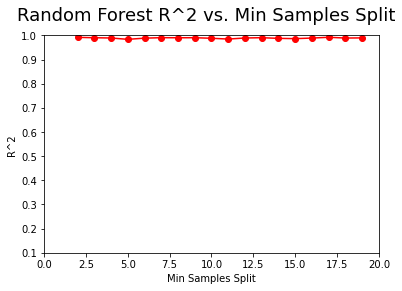

In [9]:
# tune the minimum samples required to split a node for trees in the random forest by testing various values and then visualizing them to see which value(s) have the highest
# r2 value
def tune_min_samples_split(min_split_values, train_data, test_data, train_sln, test_sln):
    rf_regression = []
    for s in min_split_values:
        current_rf = RandomForestRegressor(n_estimators=20,max_features=9,max_depth=12,max_leaf_nodes=36,min_samples_split=s)
        current_rf.fit(train_data, train_sln)
        current_prediction = current_rf.predict(test_data)
        current_regression = metrics.r2_score(test_sln, current_prediction)
        rf_regression.append(current_regression)
        
    plt.suptitle('Random Forest R^2 vs. Min Samples Split',fontsize=18)
    plt.xlabel('Min Samples Split')
    plt.ylabel('R^2')
    plt.plot(min_split_values,rf_regression,'ro-')
    plt.axis([0,min_split_values[-1]+1,.1,1])

    plt.show()

tune_min_samples_split(range(2,20), train_data, test_data, train_sln, test_sln)

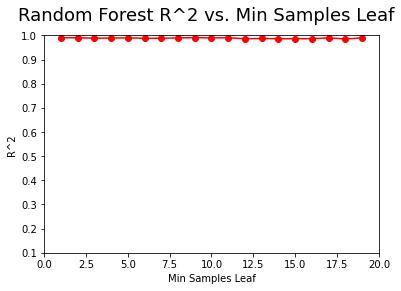

In [10]:
# tune the minimum samples required for a leaf of a tree in the random forest by testing various values and then visualizing them to see which value(s) have the highest
# r2 value
def tune_min_samples_leaf(min_leaf_values, train_data, test_data, train_sln, test_sln):
    rf_regression = []
    for l in min_leaf_values:
        current_rf = RandomForestRegressor(n_estimators=20,max_features=9,max_depth=12,max_leaf_nodes=36,min_samples_split=12,min_samples_leaf=l)
        current_rf.fit(train_data, train_sln)
        current_prediction = current_rf.predict(test_data)
        current_regression = metrics.r2_score(test_sln, current_prediction)
        rf_regression.append(current_regression)
        
    plt.suptitle('Random Forest R^2 vs. Min Samples Leaf',fontsize=18)
    plt.xlabel('Min Samples Leaf')
    plt.ylabel('R^2')
    plt.plot(min_leaf_values,rf_regression,'ro-')
    plt.axis([0,min_leaf_values[-1]+1,.1,1])

    plt.show()

tune_min_samples_leaf(range(1,20), train_data, test_data, train_sln, test_sln)

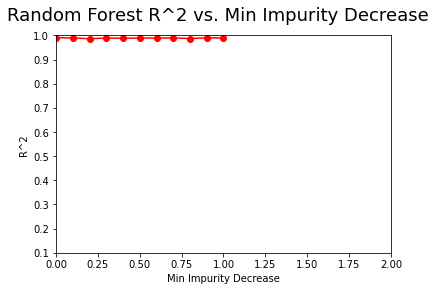

In [11]:
# tune the minimum impurity decrease required for a new node for a tree in the random forest by testing various values and then visualizing them to see which value(s) have the highest
# r2 value
def tune_min_impurity_decrease(min_impurity_values, train_data, test_data, train_sln, test_sln):
    rf_regression = []
    for i in min_impurity_values:
        current_rf = RandomForestRegressor(n_estimators=20,max_features=9,max_depth=12,max_leaf_nodes=36,min_samples_split=12,min_samples_leaf=3,min_impurity_decrease=i)
        current_rf.fit(train_data, train_sln)
        current_prediction = current_rf.predict(test_data)
        current_regression = metrics.r2_score(test_sln, current_prediction)
        rf_regression.append(current_regression)
        
    plt.suptitle('Random Forest R^2 vs. Min Impurity Decrease',fontsize=18)
    plt.xlabel('Min Impurity Decrease')
    plt.ylabel('R^2')
    plt.plot(min_impurity_values,rf_regression,'ro-')
    plt.axis([0,min_impurity_values[-1]+1,.1,1])

    plt.show()
min_impurity_values=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
tune_min_impurity_decrease(min_impurity_values, train_data, test_data, train_sln, test_sln)